# Install sk-feature

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
!pip install skfeature-chappers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.8 MB/s eta 0:00:00


In [34]:
!pip install --upgrade openpyxl

In [2]:
from google.colab import files
upload = files.upload()

Saving HR_comma_sep (1).csv to HR_comma_sep (1).csv


In [3]:
#https://www.kaggle.com/datasets/mahmoudshogaa/hr-comma-sep
#tapi jangan lgsg pake data dari link di atas untuk train

df = pd.read_csv('HR_comma_sep (1).csv', sep=',')

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df = df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident', 'promotion_last_5years',	'sales',	'salary', 'left']]

#Exploratory Data Analysis

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [7]:
#Menghitung kelas pada target variable
df['left'].value_counts()

,count
left,
0,11428
1,3571


#Preprocessing

Encode

In [8]:
salary_ohe = pd.get_dummies(df['salary'], prefix='salary', dtype= int) #onehotencode

In [9]:
salary_ohe

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [10]:
df = df.drop(['salary'], axis=1)

In [11]:
df = pd.concat([df, salary_ohe], axis=1)

In [12]:
df['sales'].nunique()

10

In [13]:
#fungsi hash untuk solve masalah kategori yang harus di encode
df['sales'] = df['sales'].apply(lambda x:hash(x)%1000)

In [14]:
df = df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'promotion_last_5years',	'sales',	'salary_high',	'salary_low',	'salary_medium', 'left']]

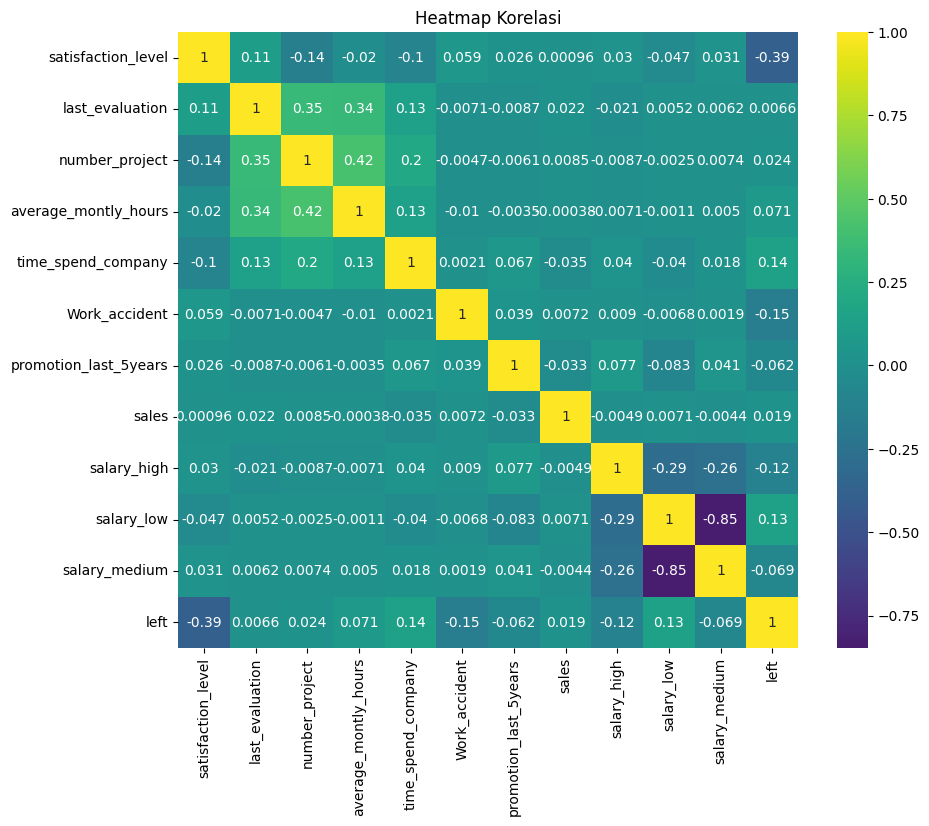

In [15]:
correlation_matrix = df.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Heatmap Korelasi')
plt.show()

Normalisasi

In [16]:
for i in['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'promotion_last_5years', 'sales']:
  df[i] = (df[i]-min(df[i]))/(max(df[i])-min(df[i]))

In [17]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary_high,salary_low,salary_medium,left
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.028571,0,1,0,1
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.028571,0,0,1,1
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.028571,0,0,1,1
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.028571,0,1,0,1
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.028571,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,0.0,1.000000,0,1,0,1
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,0.0,1.000000,0,1,0,1
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,0.0,1.000000,0,1,0,1
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,0.0,1.000000,0,1,0,1


# Split Data

Data Partitioning

In [18]:
X = df.drop(['left'], axis=1) #Independent Variable

In [19]:
y = df['left'] #Dependent variable/target/label

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Akurasi Model Sebelum SMOTE

In [35]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from skfeature.function.similarity_based import fisher_score, reliefF, trace_ratio
from skfeature.function.statistical_based import f_score, chi_square, gini_index
from skfeature.function.information_theoretical_based import FCBF

#ambil kolom untuk label diskrit (class)
label_diskrit = np.asarray(df['left'])
#print(label_diskrit)

#ambil kolom untuk label kontinu (TVC)
#label_kontinu = np.asarray(df['TVC'])
#print(label_kontinu)

# ambil kolom untuk features (respon sensor, suhu, kelembaban)
features = np.asarray(df.loc[:, 'satisfaction_level':'salary_medium'])

#melakukan label encoding label diskrit
encoder = preprocessing.LabelEncoder().fit(label_diskrit)
transformed_label_diskrit = encoder.transform(label_diskrit)
# print(transformed_label_diskrit)

# melakukan feature scaling
scaler = preprocessing.MinMaxScaler(feature_range=(0, 10)).fit(features)
scaled_feature = scaler.transform(features)
# print(scaled_feature)

# bentuk awal method dan parameter gini-index terdapat X dan y
# dimana X adalah fitur dan y adalah label
# MIM.mim(X, y)
# ranked_index = fisher_score.fisher_score(scaled_feature, transformed_label_diskrit, mode='raw')
# print("\nfisher score raw")
# print(ranked_index)

# ranked_index = fisher_score.fisher_score(scaled_feature, transformed_label_diskrit, mode='rank')
# print("\nfisher score rank")
# print(ranked_index)

ranked_index = chi_square.chi_square(scaled_feature, transformed_label_diskrit, mode='index')
print("\nchi_square")
print(ranked_index)


# menampilkan fitur yang sudah diurutkan berdasarkan seleksi fitur
result = scaled_feature[:, ranked_index[:]]
print(result)


chi_square
[ 5  0  8  9  6  4 10  3  7  2  1]
[[ 0.          3.18681319  0.         ...  0.28571429  0.
   2.65625   ]
 [ 0.          7.8021978   0.         ...  0.28571429  6.
   7.8125    ]
 [ 0.          0.21978022  0.         ...  0.28571429 10.
   8.125     ]
 ...
 [ 0.          3.07692308  0.         ... 10.          0.
   2.65625   ]
 [ 0.          0.21978022  0.         ... 10.          8.
   9.375     ]
 [ 0.          3.07692308  0.         ... 10.          0.
   2.5       ]]


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..criterion=gini, n_estimators=100;, score=0.759 total time=   0.2s
[CV 2/5] END ..criterion=gini, n_estimators=100;, score=0.759 total time=   0.2s
[CV 3/5] END ..criterion=gini, n_estimators=100;, score=0.759 total time=   0.2s
[CV 4/5] END ..criterion=gini, n_estimators=100;, score=0.759 total time=   0.2s
[CV 5/5] END ..criterion=gini, n_estimators=100;, score=0.759 total time=   0.2s
[CV 1/5] END ..criterion=gini, n_estimators=101;, score=0.759 total time=   0.2s
[CV 2/5] END ..criterion=gini, n_estimators=101;, score=0.759 total time=   0.2s
[CV 3/5] END ..criterion=gini, n_estimators=101;, score=0.759 total time=   0.2s
[CV 4/5] END ..criterion=gini, n_estimators=101;, score=0.759 total time=   0.2s
[CV 5/5] END ..criterion=gini, n_estimators=101;, score=0.759 total time=   0.2s
[CV 1/5] END ..criterion=gini, n_estimators=102;, score=0.759 total time=   0.2s
[CV 2/5] END ..criterion=gini, n_estimators=102

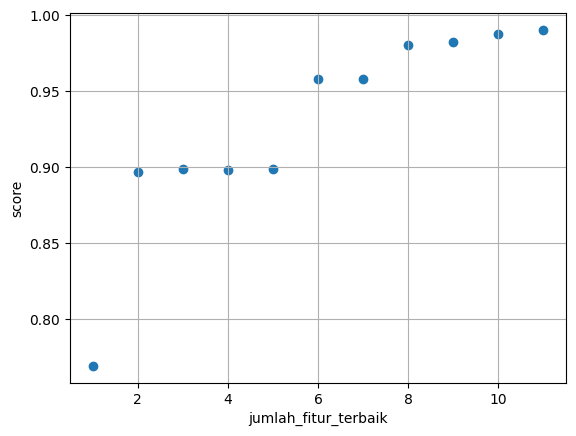

In [56]:

from sklearn.ensemble import GradientBoostingClassifier

jumlah_fitur = range(1,scaled_feature.shape[1]+1)
scores = []
score = 0
best_score = 0
best_feature_number = 0

#Mencoba optimasi hyperparameter untuk setiap kombinasi/jumlah fitur
for jumlah_fitur_terbaik in jumlah_fitur:
    #print(jumlah_fitur_terbaik)
    selected_features = result[:,0:jumlah_fitur_terbaik]
    #split data training dan data testing
    X_train, X_test, y_train, y_test = train_test_split(selected_features, label_diskrit, test_size=0.3, random_state=0)

    #classifier = DecisionTreeClassifier()
    #classifier = KNeighborsClassifier()
    #classifier = SVC()
    #classifier = GradientBoostingClassifier()
    #classifier = AdaBoostClassifier()
    classifier = RandomForestClassifier()

    # optimasi hyperparameter
    #param_grid = [
    #{'n_neighbors':[3,5,7,9,11,13,15], 'metric':['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean','mahalanobis']}
    #{'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
    #{'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3],}
    #{'n_estimators :[100, 200, 300]'}
    #]

    param_grid = {
        'n_estimators' : range(100,110),
        'criterion'    : ['gini', 'entropy']
    }

    #menentukan prioritas scoring menggunakan apa (accuracy/precision/recall, dll)
    metric = make_scorer(recall_score, average='weighted')

    model = GridSearchCV(classifier, param_grid, scoring=metric, cv=5, refit = True, verbose = 3)
    # fitting the model for grid search
    model.fit(X_train, y_train)

    # print best parameter after tuning
    print(model.best_params_)

    # print how our model looks after hyper-parameter tuning
    print(model.best_estimator_)

    #model_predictions = model.predict(X_test)

    #model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

    #menentukan model terbaik berdasarkan score terbaik menggunakan kombinasi jumlah fitur dan optimasi hyperparameter
    if(best_score < score):
      best_score = score
      best_model = model
      best_feature_number = jumlah_fitur_terbaik
      best_parameter = model.best_params_

      #menyimpan best_X_test dengan jumlah fitur terbaik
      best_X_test = X_test


plt.figure()
plt.xlabel('jumlah_fitur_terbaik')
plt.ylabel('score')
plt.scatter(jumlah_fitur, scores)
plt.grid()

print(scores);
print('Jumlah fitur terbaik adalah: ',best_feature_number)
print('Score terbaik adalah: ',best_score)
print('Parameter terbaik adalah: ',best_parameter)

final_predictions = best_model.predict(best_X_test)

# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, final_predictions))

# # plot confusion matrix
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(best_model, best_X_test, y_test)
# plt.show()


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=80, criterion= 'entropy' )

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=80)

In [43]:
y_hat = rf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_hat,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3483
           1       0.97      0.99      0.98      1017

    accuracy                           0.99      4500
   macro avg       0.98      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [ ]:
y_hat

# IMPLEMENTASI SMOTE

<ipython-input-45-65b83ae06119>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_sebelum_smote.index, y=y_sebelum_smote.values, ax=ax[0], palette="viridis")
<ipython-input-45-65b83ae06119>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_setelah_smote.index, y=y_setelah_smote.values, ax=ax[1], palette="viridis")


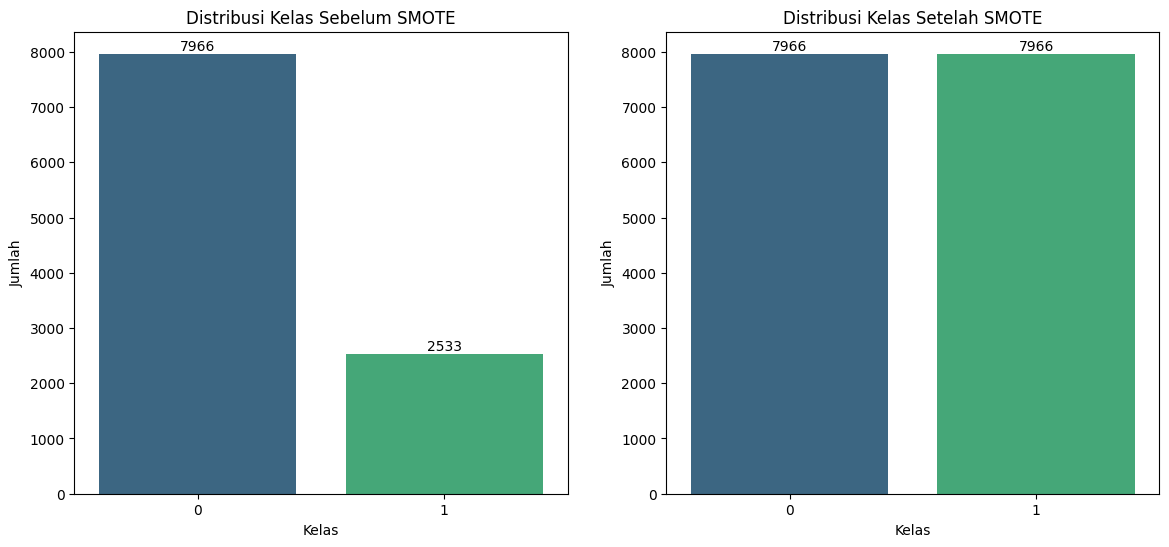

In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2, k_neighbors=3)

X_sm, y_sm = sm.fit_resample(X_train,y_train)

y_sebelum_smote = pd.Series(y_train).value_counts()
y_setelah_smote = pd.Series(y_sm).value_counts()

# Visualisasi distribusi kelas sebelum dan sesudah SMOTE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=y_sebelum_smote.index, y=y_sebelum_smote.values, ax=ax[0], palette="viridis")
ax[0].set_title('Distribusi Kelas Sebelum SMOTE')
ax[0].set_xlabel('Kelas')
ax[0].set_ylabel('Jumlah')
for i in range(len(y_sebelum_smote)):
    ax[0].text(i, y_sebelum_smote[i] + 5, str(y_sebelum_smote[i]), ha='center', va='bottom')

sns.barplot(x=y_setelah_smote.index, y=y_setelah_smote.values, ax=ax[1], palette="viridis")
ax[1].set_title('Distribusi Kelas Setelah SMOTE')
ax[1].set_xlabel('Kelas')
ax[1].set_ylabel('Jumlah')
for i in range(len(y_setelah_smote)):
    ax[1].text(i, y_setelah_smote[i] + 5, str(y_setelah_smote[i]), ha='center', va='bottom')

plt.show()


# Akurasi Model Setelah SMOTE

Building Model

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier()

In [48]:
rf.fit(X_sm, y_sm)

RandomForestClassifier()

In [49]:
y_hat = rf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [51]:
acc = accuracy_score(y_hat, y_test)
recall = recall_score(y_hat, y_test)
precision = precision_score(y_hat, y_test)


print('acc :', acc)
print('recall :', recall)
print('precision :',  precision)


acc : 0.9886666666666667
recall : 0.9833496571988247
precision : 0.9672447013487476


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_hat,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3479
           1       0.97      0.98      0.98      1021

    accuracy                           0.99      4500
   macro avg       0.98      0.99      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [53]:
y_hat

array([1, 0, 0, ..., 0, 0, 0])

In [54]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [55]:
hasil = pd.DataFrame({'y_test': y_test,
                      'y_hat': y_hat})
hasil

,y_test,y_hat
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4495,0,0
4496,0,0
4497,0,0
4498,0,0


In [ ]:
# df_awal = pd.read_csv('HR_comma_sep latih.csv', sep=';')
df_awal = pd.read_csv('HR_comma_sep (1).csv', sep=',')
df_awal

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
#Menyatukan X_test dengan y_test dan y_hat
combined_df = hasil.merge(df_awal, left_index=True, right_index=True)
combined_df

,y_test,y_hat,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
3862,0,0,0.69,0.89,5,201,2,0,0,0,support,low
13094,0,0,0.48,0.86,5,198,4,0,0,0,technical,low
7006,0,0,0.44,0.39,2,188,3,0,0,0,technical,low
10459,0,0,0.49,0.89,3,213,2,0,0,0,support,low
10719,0,0,0.90,0.57,4,185,3,1,0,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
3087,0,0,0.17,0.76,4,280,5,0,0,0,hr,low
3422,0,0,0.88,0.66,4,271,3,1,0,0,IT,medium
7213,0,0,0.72,0.73,5,211,2,0,0,0,technical,medium
1793,1,1,0.43,0.51,2,143,3,0,1,0,technical,medium


In [ ]:
combined_df.to_csv('hasil belajar purwadhika hari ke 3.csv')
files.download('hasil belajar purwadhika hari ke 3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# test 1

smote data testing

In [ ]:
from google.colab import files
upload = files.upload()

Saving data test.csv to data test (1).csv


In [ ]:
df_test = pd.read_csv('data test.csv', sep=';')
df_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.40,0.57,2,151,3,0,NaN,0,support,low
1,0.37,0.48,2,160,3,0,NaN,0,support,low
2,0.37,0.53,2,143,3,0,NaN,0,support,low
3,0.11,0.96,6,280,4,0,NaN,0,support,low
4,0.37,0.52,2,158,3,0,NaN,0,support,low


In [ ]:
df_test.dropna()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


In [ ]:
df_2 = pd.concat([df_awal, df_test], axis=0)
df_2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1.0,0,sales,low
1,0.80,0.86,5,262,6,0,1.0,0,sales,medium
2,0.11,0.88,7,272,4,0,1.0,0,sales,medium
3,0.72,0.87,5,223,5,0,1.0,0,sales,low
4,0.37,0.52,2,159,3,0,1.0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
0,0.40,0.57,2,151,3,0,NaN,0,support,low
1,0.37,0.48,2,160,3,0,NaN,0,support,low
2,0.37,0.53,2,143,3,0,NaN,0,support,low
3,0.11,0.96,6,280,4,0,NaN,0,support,low


In [ ]:
df_2 = df_2.reset_index()
df_2

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1.0,0,sales,low
1,1,0.80,0.86,5,262,6,0,1.0,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1.0,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1.0,0,sales,low
4,4,0.37,0.52,2,159,3,0,1.0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14999,0,0.40,0.57,2,151,3,0,NaN,0,support,low
15000,1,0.37,0.48,2,160,3,0,NaN,0,support,low
15001,2,0.37,0.53,2,143,3,0,NaN,0,support,low
15002,3,0.11,0.96,6,280,4,0,NaN,0,support,low


In [ ]:
df_2 = df_2.drop(['index'], axis=1)

In [ ]:
salary_ohe = pd.get_dummies(df_2['salary'], prefix='salary', dtype= int) #onehotencode

In [ ]:
df_2 = df_2.drop(['salary'], axis=1)

In [ ]:
df_2 = pd.concat([df_2, salary_ohe], axis=1)

In [ ]:
#fungsi hash untuk solve masalah kategori yang harus di encode
df_2['sales'] = df_2['sales'].apply(lambda x:hash(x)%1000)

In [ ]:
for i in['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'promotion_last_5years', 'sales']:
  df_2[i] = (df_2[i]-min(df_2[i]))/(max(df_2[i])-min(df_2[i]))

In [ ]:
#Misahin data uji
uji = df_2[df_2.isnull().any(axis=1)]
uji

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary_high,salary_low,salary_medium
14999,0.340659,0.328125,0.0,0.257009,0.125,0.0,NaN,0.0,0.049238,0,1,0
15000,0.307692,0.187500,0.0,0.299065,0.125,0.0,NaN,0.0,0.049238,0,1,0
15001,0.307692,0.265625,0.0,0.219626,0.125,0.0,NaN,0.0,0.049238,0,1,0
15002,0.021978,0.937500,0.8,0.859813,0.250,0.0,NaN,0.0,0.049238,0,1,0
15003,0.307692,0.250000,0.0,0.289720,0.125,0.0,NaN,0.0,0.049238,0,1,0


In [ ]:
latih = df_2[~df_2.isnull().any(axis=1)]
latih

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.073857,0,1,0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.073857,0,0,1
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.073857,0,0,1
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.073857,0,1,0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.073857,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,1.0,0.0,0.049238,0,1,0
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,1.0,0.0,0.049238,0,1,0
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,1.0,0.0,0.049238,0,1,0
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,1.0,0.0,0.049238,0,1,0


In [ ]:
#Pembagian X_train, X_test, y_train, y_test
X_train2 = latih.drop(['left'], axis=1)
y_train2 = latih['left']

X_test2 = uji.drop(['left'], axis=1)
y_test2 = uji['left']

In [ ]:
X_test2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary_high,salary_low,salary_medium
14999,0.340659,0.328125,0.0,0.257009,0.125,0.0,0.0,0.049238,0,1,0
15000,0.307692,0.187500,0.0,0.299065,0.125,0.0,0.0,0.049238,0,1,0
15001,0.307692,0.265625,0.0,0.219626,0.125,0.0,0.0,0.049238,0,1,0
15002,0.021978,0.937500,0.8,0.859813,0.250,0.0,0.0,0.049238,0,1,0
15003,0.307692,0.250000,0.0,0.289720,0.125,0.0,0.0,0.049238,0,1,0


<ipython-input-102-6461d8e50e08>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_sebelum_smote.index, y=y_sebelum_smote.values, ax=ax[0], palette="viridis")
<ipython-input-102-6461d8e50e08>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_setelah_smote.index, y=y_setelah_smote.values, ax=ax[1], palette="viridis")


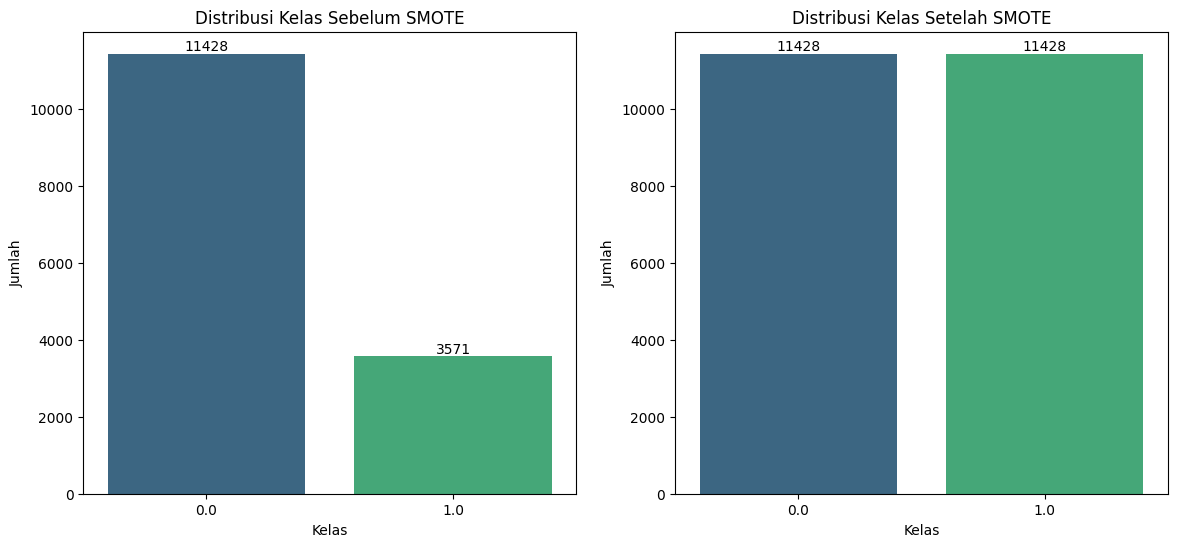

In [ ]:

sm = SMOTE(random_state=2, k_neighbors=3)

X_sm_2, y_sm_2 = sm.fit_resample(X_train2,y_train2)

y_sebelum_smote = pd.Series(y_train2).value_counts()
y_setelah_smote = pd.Series(y_sm_2).value_counts()

# Visualisasi distribusi kelas sebelum dan sesudah SMOTE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=y_sebelum_smote.index, y=y_sebelum_smote.values, ax=ax[0], palette="viridis")
ax[0].set_title('Distribusi Kelas Sebelum SMOTE')
ax[0].set_xlabel('Kelas')
ax[0].set_ylabel('Jumlah')
for i in range(len(y_sebelum_smote)):
    ax[0].text(i, y_sebelum_smote[i] + 5, str(y_sebelum_smote[i]), ha='center', va='bottom')

sns.barplot(x=y_setelah_smote.index, y=y_setelah_smote.values, ax=ax[1], palette="viridis")
ax[1].set_title('Distribusi Kelas Setelah SMOTE')
ax[1].set_xlabel('Kelas')
ax[1].set_ylabel('Jumlah')
for i in range(len(y_setelah_smote)):
    ax[1].text(i, y_setelah_smote[i] + 5, str(y_setelah_smote[i]), ha='center', va='bottom')

plt.show()


In [ ]:
rf.fit(X_sm_2, y_sm_2)

RandomForestClassifier()

In [ ]:
y_hat_2 = rf.predict(X_test2)
y_hat_2

array([1., 1., 1., 1., 1.])

# test 2

akurasi data testing

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf2 = RandomForestClassifier()

In [ ]:
rf2.fit(X_sm_2, y_sm_2)

RandomForestClassifier()

In [ ]:
y_hat_2 = rf.predict(X_test2)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_hat_2,y_test2))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_pred contains NaN.